In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('flightprice.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum() # We can see that there are some missing values present in this dataset in couple of Attributes

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.dtypes   # We can see that there are almost every Attribute is in Object Class

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
#Lets remove the missing values from this dataset

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Route']=imp.fit_transform(df['Route'].values.reshape(-1,1))
df['Total_Stops']=imp.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# From above we can see that now after using Imputer function there in no mising values left in the Dataset

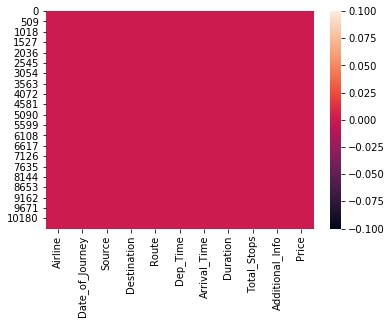

In [10]:
sns.heatmap(df.isnull())

In this Heatmap we can see that there is no color change which shows that now there is no missing values left in this dataset

In [11]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


As we can see that there are so many Object Attributes available in this dataset and we cant apply mathmatical function to the Objects attribtes so we ned to convert the Object in to Integer so that we can later apply maths functions on this Dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'].astype('str'))
df['Date_of_Journey']=le.fit_transform(df['Date_of_Journey'].astype('str'))
df['Source']=le.fit_transform(df['Source'].astype('str'))
df['Destination']=le.fit_transform(df['Destination'].astype('str'))
df['Route']=le.fit_transform(df['Route'].astype('str'))
df['Dep_Time']=le.fit_transform(df['Dep_Time'].astype('str'))
df['Arrival_Time']=le.fit_transform(df['Arrival_Time'].astype('str'))
df['Duration']=le.fit_transform(df['Duration'].astype('str'))
df['Total_Stops']=le.fit_transform(df['Total_Stops'].astype('str'))
df['Additional_Info']=le.fit_transform(df['Additional_Info'].astype('str'))

In [14]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
5,8,27,3,0,64,66,830,235,4,8,3873
6,4,8,0,5,5,172,742,65,0,5,11087
7,4,0,0,5,5,55,463,145,0,8,22270
8,4,8,0,5,5,65,742,185,0,5,11087
9,6,30,2,1,104,91,1124,341,0,8,8625


Now a we can see that all the columns those are in Object from are now converted to Integer and now we can appy mathmatical functons to it

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Date_of_Journey  10683 non-null  int32
 2   Source           10683 non-null  int32
 3   Destination      10683 non-null  int32
 4   Route            10683 non-null  int32
 5   Dep_Time         10683 non-null  int32
 6   Arrival_Time     10683 non-null  int32
 7   Duration         10683 non-null  int32
 8   Total_Stops      10683 non-null  int32
 9   Additional_Info  10683 non-null  int32
 10  Price            10683 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 500.9 KB


In [16]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


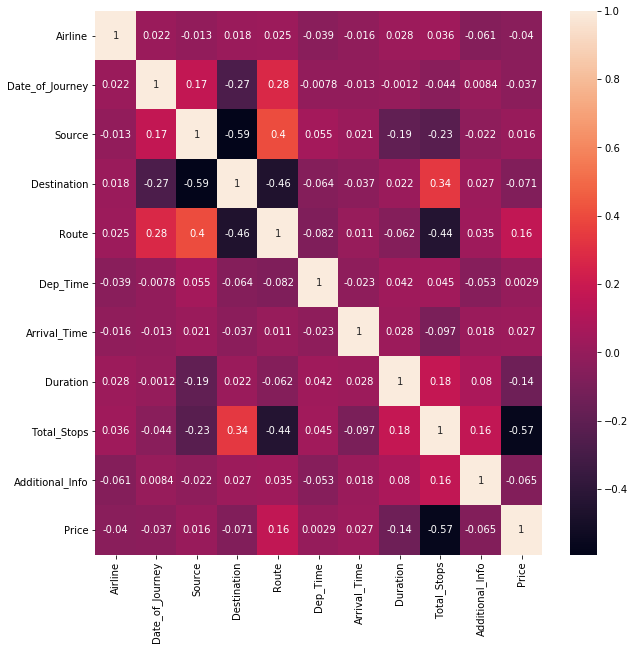

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

Will remove some columns as according to this heatmap we have some Negatively correlated columns and it can effect our end Result

In [18]:
df.drop(['Total_Stops'],axis=1,inplace=True)

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info', 'Price'],
      dtype='object')

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,24,0,5,18,211,233,240,8,3897
1,1,6,3,0,84,31,906,336,8,7662
2,4,43,2,1,118,70,413,106,8,13882
3,3,10,3,0,91,164,1324,311,8,6218
4,3,0,0,5,29,149,1237,303,8,13302


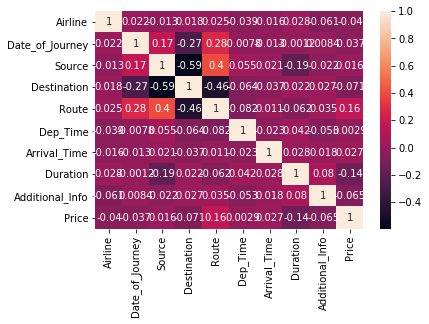

In [21]:
sns.heatmap(df.corr(),annot=True)

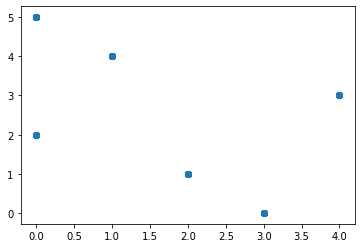

In [22]:
plt.scatter(df['Source'],df['Destination'])
plt.show()

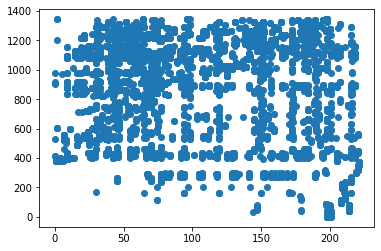

In [23]:
plt.scatter(df['Dep_Time'],df['Arrival_Time'])
plt.show()

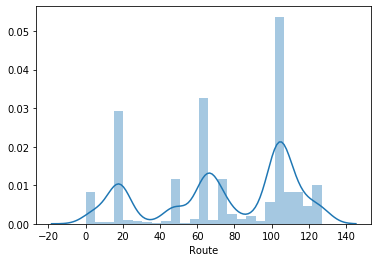

In [24]:
sns.distplot(df['Route'])
plt.show()

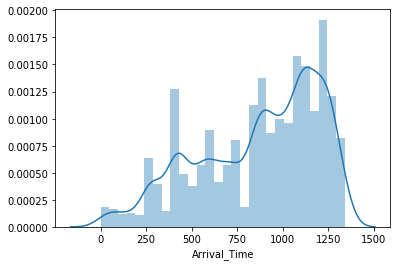

In [25]:
sns.distplot(df['Arrival_Time'])
plt.show()

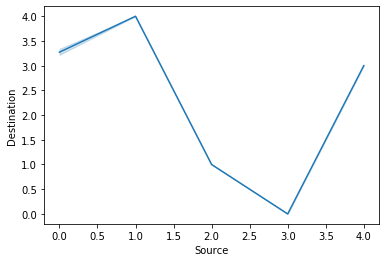

In [26]:
sns.lineplot(df['Source'],df['Destination'])
plt.show()

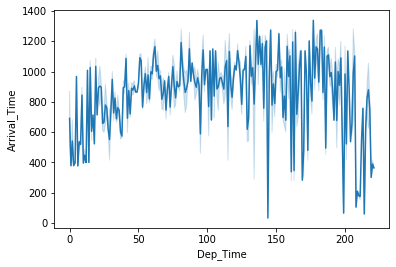

In [27]:
sns.lineplot(df['Dep_Time'],df['Arrival_Time'])
plt.show()

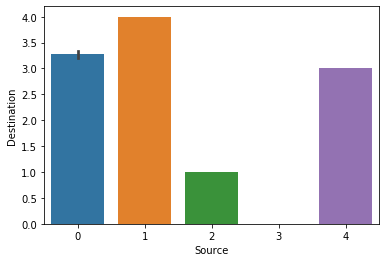

In [28]:
sns.barplot(df['Source'],df['Destination'])
plt.show()

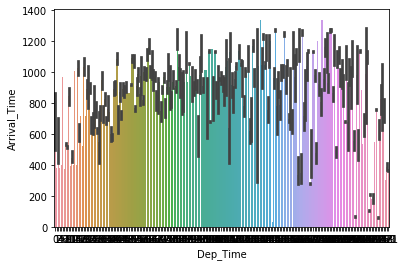

In [29]:
sns.barplot(df['Dep_Time'],df['Arrival_Time'])
plt.show()

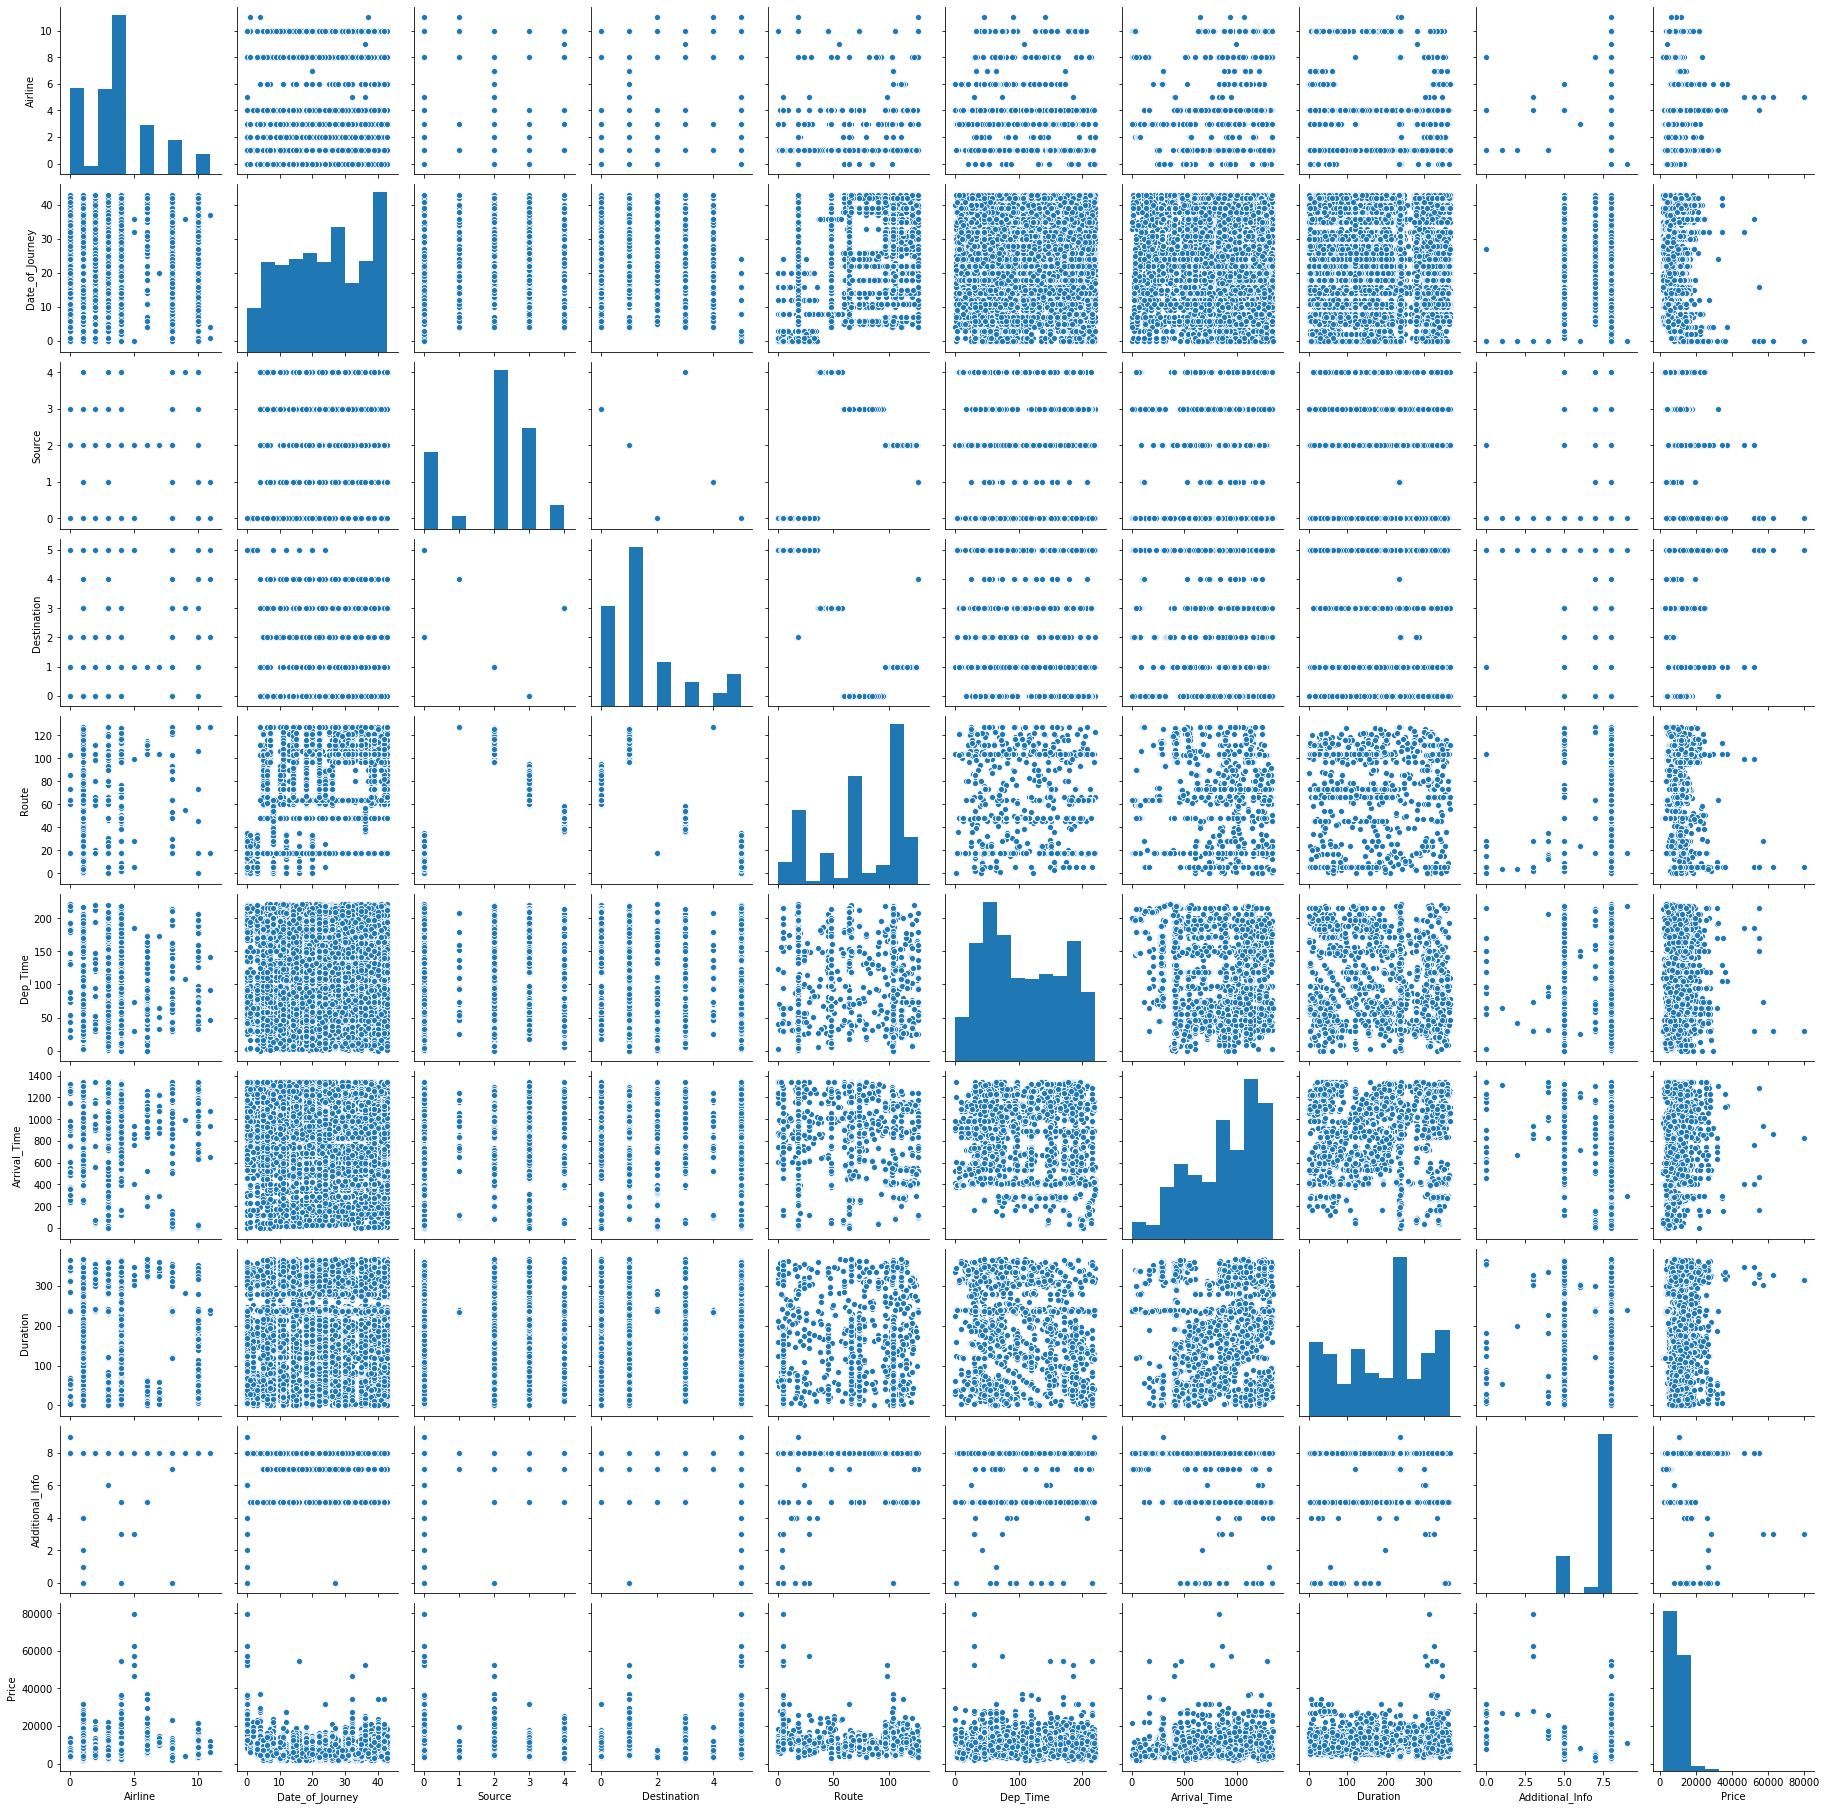

In [30]:
sns.pairplot(df)

In [31]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,9.000000,79512.000000


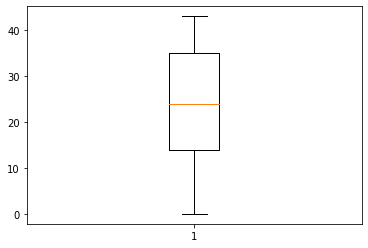

In [32]:
plt.boxplot(df['Date_of_Journey'])
plt.show()

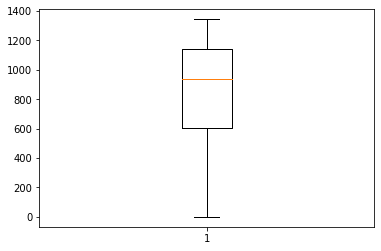

In [33]:
plt.boxplot(df['Arrival_Time'])
plt.show()

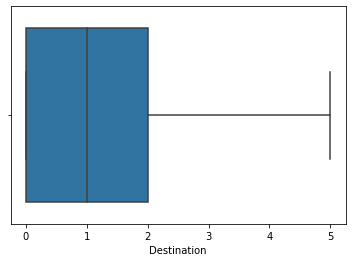

In [34]:
sns.boxplot(df['Destination'])
plt.show()

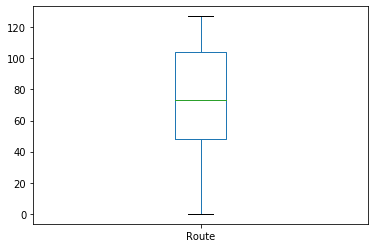

In [35]:
df['Route'].plot.box()

In [36]:
#Lets Check for OutLiers by using ZSCORE

In [37]:
from scipy.stats import zscore

In [38]:
z=np.abs(zscore(df))
z

array([[0.41067545, 0.02147223, 1.65844074, ..., 0.42287466, 0.49989167,
        1.12554821],
       [1.26099927, 1.4375315 , 0.89005213, ..., 1.30672664, 0.49989167,
        0.30904789],
       [0.01448647, 1.56153172, 0.04055451, ..., 0.81083539, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 0.42675104, 1.65844074, ..., 0.79114632, 0.49989167,
        0.40295085],
       [2.56545795, 1.92386608, 1.65844074, ..., 0.40446108, 0.49989167,
        0.77224576],
       [1.26099927, 1.48047596, 0.04055451, ..., 1.40800134, 0.49989167,
        0.57815073]])

In [39]:
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
          826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
         1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
         2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
         2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
         3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
         4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
         5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
         6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
         7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
         8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
         8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
         9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
        10383, 10439, 10511, 10511], dtype=int64),
 array([9, 9, 9, 9, 9, 9, 

In [40]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price
0,3,24,0,5,18,211,233,240,8,3897
1,1,6,3,0,84,31,906,336,8,7662
2,4,43,2,1,118,70,413,106,8,13882
3,3,10,3,0,91,164,1324,311,8,6218
4,3,0,0,5,29,149,1237,303,8,13302
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,8,4107
10679,1,29,3,0,64,193,1305,237,8,4145
10680,4,29,0,2,18,58,824,280,8,7229
10681,10,0,0,5,18,92,938,238,8,12648


In [41]:
df.shape

(10683, 10)

In [42]:
# Here we can see that 105 Rows are deleted as Outliers from this dataset

# NOW, WE HAVE TO TRAIN OUR MODEL

In [43]:
x=df_new.iloc[:,0:9]
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info
0,3,24,0,5,18,211,233,240,8
1,1,6,3,0,84,31,906,336,8
2,4,43,2,1,118,70,413,106,8
3,3,10,3,0,91,164,1324,311,8
4,3,0,0,5,29,149,1237,303,8
...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,8
10679,1,29,3,0,64,193,1305,237,8
10680,4,29,0,2,18,58,824,280,8
10681,10,0,0,5,18,92,938,238,8


In [44]:
y=df_new.iloc[:,-1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10578, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [46]:
max_r_score=0
for r_state in range(10,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print('')
print('The max r2score corresponing to the',final_r_state,'is',max_r_score)


The max r2score corresponing to the 172 is 0.14264116209041355


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=172)

In [48]:
linr.fit(x_train,y_train)
linr.score(x_train,y_train)

0.1021639151857352

In [49]:
predlinr=linr.predict(x_test)
print('R2-Score',r2_score(y_test,predlinr))
print(mean_absolute_error(y_test,predlinr))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predlinr)))

R2-Score 0.14264116209041355
3091.107032568399
RMSE= 3705.0101417080823


# ENSEMBLE TECHNIQUIES

In [50]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [51]:
#Random Forest Regressor
rf=RandomForestRegressor(n_estimators=200, random_state=172)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9819424809499394

In [52]:
predrf=rf.predict(x_test)
print('R2Score',r2_score(y_test,predrf))

R2Score 0.8976095142961471


In [53]:
#Ada-Boost Regressor
ad=AdaBoostRegressor(random_state=172)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.3225403252383935

In [54]:
predad=ad.predict(x_test)
print('R2Score=',r2_score(y_test,predad))

R2Score= 0.3178654046598771


In [55]:
#Gradient-Boosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.808582726770105

In [56]:
predgb=gb.predict(x_test)
print('r2score=',r2_score(y_test,predgb))

r2score= 0.795981456602632


# REGULARISATION TECHNIQUE

In [57]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [58]:
#Now, we use GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model, param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#Summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.10983353347841145
0.1
{'alpha': 0.1}


In [59]:
#Lasso Regression
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.10216391279763459

In [60]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#Summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.1098336306275974
1
{'alpha': 1}


In [61]:
# Ridge Regression
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.10216391466845831

In [62]:
rd.coef_

array([ -58.16551264,  -19.24719301, -453.03411651, -369.80710207,
         27.56060681,    2.00853249,    0.46447532,   -6.32435155,
       -120.91907325])

In [63]:
rd.intercept_

10423.01021805316

In [64]:
#ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.10216391510392342

# TO SAVE THE BEST-MODEL

In [65]:
from sklearn.externals import joblib

In [66]:
joblib.dump(rf,'rffile.obj') # Random Forest is the best model as we are getting the best R2 Score with Random Forest

['rffile.obj']